# Simulation and Prediction
___

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'D:\PycharmProjects\Pacmann\Probability\Retail_Sales_Analysis\data\train_processed.csv')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,second class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,south,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,second class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,south,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,second class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,west,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,standard class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,south,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,standard class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,south,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,standard class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,standard class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,east,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,standard class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,east,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,standard class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,east,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### 1. Simulation Using Random Variables

* explore and analyze the `sales` data by `Category` and `Region`.

In [3]:
# grouping sales data by category and region
sales_by_category = data.groupby('Category')['Sales'].describe()
sales_by_region = data.groupby('Region')['Sales'].describe()

In [4]:
sales_by_category

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,2078.0,350.653790,501.489219,1.892,47.19,182.610,435.237,4416.174
Office Supplies,5909.0,119.381001,383.761427,0.444,11.76,27.360,79.470,9892.740
Technology,1813.0,456.401474,1116.818701,0.990,67.98,167.944,453.576,22638.480


In [5]:
sales_by_region

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
central,2277.0,216.357889,636.040148,0.444,14.560,45.920,201.9600,17499.950
east,2785.0,240.401697,626.366105,0.852,17.712,54.960,211.9600,11199.968
south,1598.0,243.524067,779.850548,1.167,17.088,54.114,209.9475,22638.480
west,3140.0,226.184613,524.240789,0.990,19.440,61.002,215.6065,13999.960


* Generate Probability Distributions and Simulate Possible Sales Outcomes

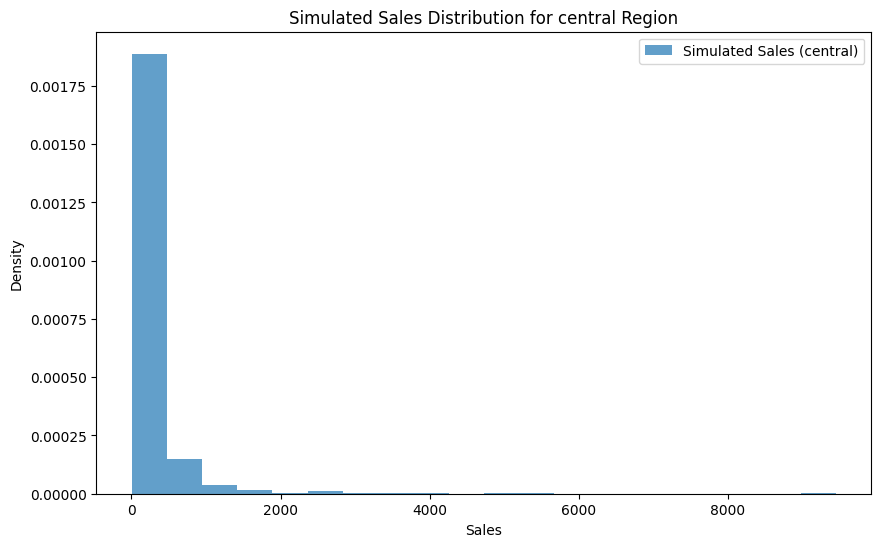

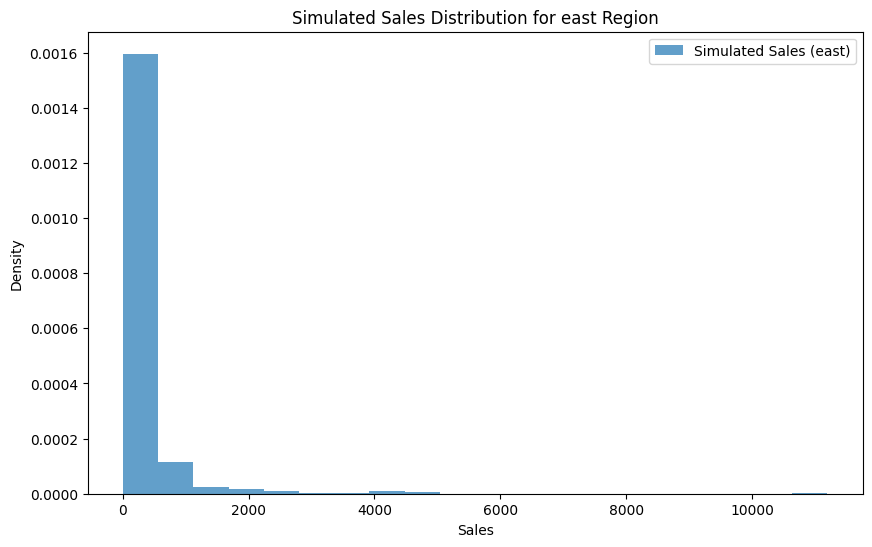

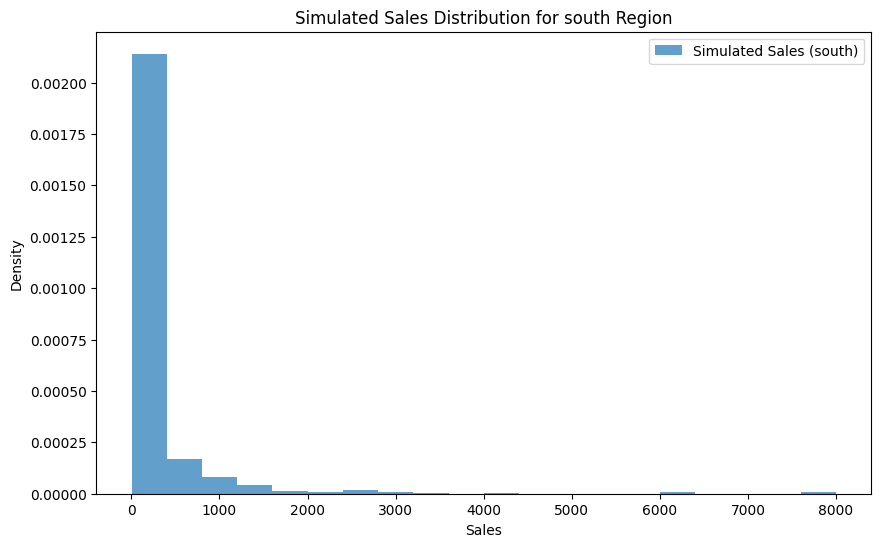

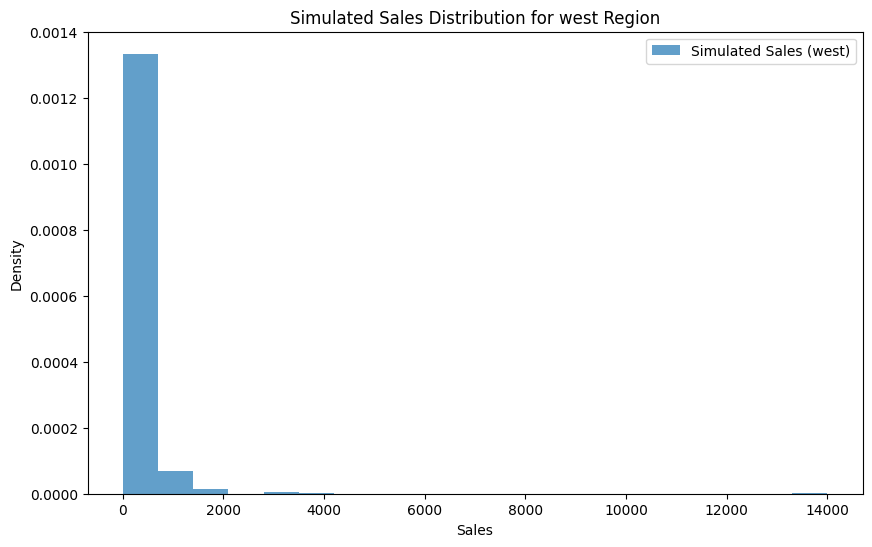

,central,east,south,west
0,18.690,8.256,65.232,198.460
1,20.070,37.056,24.896,676.550
2,520.464,12.070,26.850,11.952
3,520.464,756.800,452.940,25.920
4,65.520,36.630,30.440,239.970
...,...,...,...,...
995,27.168,59.913,31.104,8.560
996,6.588,98.210,27.900,17.220
997,13.568,64.944,103.600,552.000
998,10.476,23.920,122.970,2803.920


In [6]:
import numpy as np
import matplotlib.pyplot as plt

region_sales_simulations = {}

# number of simulations
num_simulations = 1000

# generate probability dist and simulate sales outcomes
for region in sales_by_region.index:
    region_sales = data[data['Region'] == region]['Sales']
    simulated_sales = np.random.choice(region_sales, num_simulations, replace=True)
    region_sales_simulations[region] = simulated_sales

    # plot the probability dist for each region
    plt.figure(figsize = (10,6))
    plt.hist(simulated_sales, bins = 20, alpha=0.7, density = True, label = f'Simulated Sales ({region})')
    plt.title(f'Simulated Sales Distribution for {region} Region')
    plt.xlabel('Sales')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# combining all
simulation_results = pd.DataFrame(region_sales_simulations)
simulation_results

* Compare simulated outcomes with historical averages and variances by region.

In [7]:
# calculate historical avg and var
historical_data = data.groupby('Region')['Sales'].describe()
simulation_data = simulation_results.describe()

In [8]:
historical_data.T

Region,central,east,south,west
count,2277.000000,2785.000000,1598.000000,3140.000000
mean,216.357889,240.401697,243.524067,226.184613
std,636.040148,626.366105,779.850548,524.240789
min,0.444000,0.852000,1.167000,0.990000
25%,14.560000,17.712000,17.088000,19.440000
50%,45.920000,54.960000,54.114000,61.002000
75%,201.960000,211.960000,209.947500,215.606500
max,17499.950000,11199.968000,22638.480000,13999.960000


In [9]:
simulation_data

,central,east,south,west
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,201.715228,252.225225,260.875744,212.037025
std,521.373408,644.211464,696.853223,570.516056
min,0.556000,1.240000,1.584000,1.080000
25%,14.340000,19.440000,17.935000,19.920000
50%,47.022000,59.955000,59.920000,59.520000
75%,190.875000,240.070000,209.902500,211.366000
max,9449.950000,11199.968000,7999.980000,13999.960000


### 2. Prediction

* Using expectation (mean) of simulated scenarios to predict the mean of sales.
* Evaluate uncertainty by calculating variance and confidence intervals.

In [10]:
# Calculate historical averages and variances for each region
historical_averages = data.groupby('Region')['Sales'].mean()
historical_variances = data.groupby('Region')['Sales'].var()

# Compare simulated outcomes with historical data
comparison_results = pd.DataFrame({
    'Historical Mean': historical_averages,
    'Simulated Mean': simulation_results.mean(),
    'Historical Variance': historical_variances,
    'Simulated Variance': simulation_results.var()
})

In [11]:
# Calculate full descriptive statistics for historical and simulated sales by region
historical_descriptive_stats = data.groupby('Region')['Sales'].describe()
simulated_descriptive_stats = simulation_results.describe()

# Combine both sets of descriptive statistics for comparison
comparison_full_stats = pd.concat([historical_descriptive_stats, simulated_descriptive_stats.T], axis=1, keys=['Historical', 'Simulated'])

# Rename the columns for better clarity
comparison_full_stats.columns = [
    f"{col[0]} - {col[1]}" for col in comparison_full_stats.columns
]

In [12]:
# Split the combined descriptive statistics into two separate tables
historical_stats_table = historical_descriptive_stats.copy()
simulated_stats_table = simulated_descriptive_stats.T.copy()

In [14]:
from scipy.stats import norm

# Calculate predictive insights (expectation, variance, and confidence intervals)
predictions = {}

for region in simulated_stats_table.index:
    # Extract mean and standard deviation of simulated sales
    mean = simulated_stats_table.loc[region, 'mean']
    std_dev = simulated_stats_table.loc[region, 'std']
    count = simulated_stats_table.loc[region, 'count']

    # Confidence interval (95% confidence level)
    ci_lower, ci_upper = norm.interval(0.95, loc=mean, scale=std_dev / (count**0.5))

    predictions[region] = {
        'Expected Sales (Mean)': mean,
        'Variance': std_dev**2,
        '95% CI Lower': ci_lower,
        '95% CI Upper': ci_upper
    }

# Convert predictions dictionary into a DataFrame for better visualization
predictions_df = pd.DataFrame(predictions).T
predictions_df

,Expected Sales (Mean),Variance,95% CI Lower,95% CI Upper
central,201.715228,271830.230648,169.400763,234.029693
east,252.225225,415008.410674,212.297318,292.153132
south,260.875744,485604.415028,217.685128,304.066361
west,212.037025,325488.570337,176.676723,247.397326
